In [1364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import string as st
import re

In [1365]:
df = pd.read_csv("IEEE ZSB Database'24.xlsx - Form Responses 1.csv")
df

,Unnamed: 0,Unnamed: 1,Committee\Chapter,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Unnamed: 14,Expected year of graduation
0,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,2nd mecha power,10th of ramadan city,2003,NaN,NaN,2026
1,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,3rd year,Hehia,2003,NaN,NaN,2026
2,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Faculty Of Commerce Credit Hours English program,3rd year,Zagazig,3/18/2003,NaN,NaN,2025
3,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,3rd year,10th of Ramadan city,7/20/2003,NaN,NaN,2026
4,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Faculty of Arts Sociology *,4th year,Belbies,10/10/2003,NaN,NaN,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,NaN,NaN,WIE,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,3rd year,Zefta,6/4/2003,NaN,NaN,2026
292,NaN,NaN,WIE,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,4th year,Zagazig,12/8/2002,NaN,NaN,Engineering
293,NaN,NaN,WIE,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,4th year,Belbais,7/6/2002,NaN,NaN,2025
294,NaN,NaN,WIE,NaN,NaN,NaN,NaN,NaN,NaN,engineering,3rd year,fakous,5/20/2003,RAS,NaN,2026


In [1366]:
# remove unneneccesary columns
rem_cols = df.columns [df.columns.str.contains('Unnamed')]
rem_cols

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 14'],
      dtype='object')

In [1367]:
df = df.drop(columns = rem_cols)

In [1368]:
df

,Committee\Chapter,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Expected year of graduation
0,Ambassadors,Engineering,2nd mecha power,10th of ramadan city,2003,NaN,2026
1,Ambassadors,Engineering,3rd year,Hehia,2003,NaN,2026
2,Ambassadors,Faculty Of Commerce Credit Hours English program,3rd year,Zagazig,3/18/2003,NaN,2025
3,Ambassadors,Engineering,3rd year,10th of Ramadan city,7/20/2003,NaN,2026
4,Ambassadors,Faculty of Arts Sociology *,4th year,Belbies,10/10/2003,NaN,2025
...,...,...,...,...,...,...,...
291,WIE,Engineering,3rd year,Zefta,6/4/2003,NaN,2026
292,WIE,Engineering,4th year,Zagazig,12/8/2002,NaN,Engineering
293,WIE,Engineering,4th year,Belbais,7/6/2002,NaN,2025
294,WIE,engineering,3rd year,fakous,5/20/2003,RAS,2026


In [1369]:
df.dtypes

Committee\Chapter                                           object
Faculty                                                     object
Grade                                                       object
City                                                        object
Date of birth                                               object
If you're part of two teams, what's of your second team?    object
Expected year of graduation                                 object
dtype: object

In [1370]:
# cast year od grad to integer
dates = []
for date in df['Expected year of graduation']:
    nw_date = str(date).translate({ord(i):None for i in st.ascii_letters})
    nw_date=nw_date.replace(' ','')
    if not nw_date:
        dates.append(np.nan)
    else:
        dates.append(nw_date)
dates

['2026',
 '2026',
 '2025',
 '2026',
 '2025',
 '2026',
 '2025',
 '2025',
 '2026',
 '2025',
 '2025',
 '2025',
 '2024',
 '2027',
 '2024',
 '2025',
 '2026',
 '2025',
 '2024',
 '2026',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2027',
 '2025',
 '2025',
 '2024',
 '2025',
 '2025',
 '2026',
 '2024',
 '2025',
 '2026',
 '2026',
 '2026',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2026',
 '2025',
 '2025',
 '2027',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 nan,
 '2025',
 '2025',
 '2026',
 '2028',
 '2025',
 '2025',
 '2025',
 '2026',
 '2026',
 '2027',
 '2024',
 '2025',
 '2025',
 '2025',
 '2027',
 '2026',
 '2026',
 '2025',
 '2025',
 '2027',
 '2024',
 '2025',
 '2025',
 '2024',
 '2026',
 '2025',
 '2025',
 '2025',
 '2023',
 '2026',
 '2025',
 '2024',
 '2025',
 '2024',
 nan,
 '2026',
 '2025',
 '2025',
 '2025',
 '2026',
 '2026',
 '2026',
 '2025',
 '2025',
 '2025',
 '2027',
 '2025',
 '2024',
 '2028',
 '2025',
 '2026',
 '2028',
 '2025',
 '2025'

In [1371]:
# replace date with only starting date
for i in range(len(dates)):
    if type(dates[i]) == str:
        nw_date = ''
        for el in dates[i]:
            if not el.isdigit():
                break
            nw_date += el
        dates[i] = int(nw_date)

dates

[2026,
 2026,
 2025,
 2026,
 2025,
 2026,
 2025,
 2025,
 2026,
 2025,
 2025,
 2025,
 2024,
 2027,
 2024,
 2025,
 2026,
 2025,
 2024,
 2026,
 2025,
 2025,
 2025,
 2025,
 2025,
 2025,
 2025,
 2027,
 2025,
 2025,
 2024,
 2025,
 2025,
 2026,
 2024,
 2025,
 2026,
 2026,
 2026,
 2025,
 2025,
 2025,
 2025,
 2025,
 2025,
 2025,
 2026,
 2025,
 2025,
 2027,
 2025,
 2025,
 2025,
 2025,
 2025,
 2025,
 2025,
 nan,
 2025,
 2025,
 2026,
 2028,
 2025,
 2025,
 2025,
 2026,
 2026,
 2027,
 2024,
 2025,
 2025,
 2025,
 2027,
 2026,
 2026,
 2025,
 2025,
 2027,
 2024,
 2025,
 2025,
 2024,
 2026,
 2025,
 2025,
 2025,
 2023,
 2026,
 2025,
 2024,
 2025,
 2024,
 nan,
 2026,
 2025,
 2025,
 2025,
 2026,
 2026,
 2026,
 2025,
 2025,
 2025,
 2027,
 2025,
 2024,
 2028,
 2025,
 2026,
 2028,
 2025,
 2025,
 2026,
 2025,
 2026,
 2024,
 2025,
 2025,
 2024,
 2026,
 2025,
 2025,
 2025,
 2025,
 2026,
 2025,
 2025,
 2026,
 2025,
 2026,
 2025,
 2025,
 2026,
 2025,
 2026,
 2025,
 2025,
 2025,
 2025,
 2026,
 2026,
 2025,
 2026,
 

In [1372]:
dates = pd.Series(dates,dtype = 'Int64')

In [1373]:
df['Expected year of graduation'] =  dates

In [1374]:
df

,Committee\Chapter,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Expected year of graduation
0,Ambassadors,Engineering,2nd mecha power,10th of ramadan city,2003,NaN,2026
1,Ambassadors,Engineering,3rd year,Hehia,2003,NaN,2026
2,Ambassadors,Faculty Of Commerce Credit Hours English program,3rd year,Zagazig,3/18/2003,NaN,2025
3,Ambassadors,Engineering,3rd year,10th of Ramadan city,7/20/2003,NaN,2026
4,Ambassadors,Faculty of Arts Sociology *,4th year,Belbies,10/10/2003,NaN,2025
...,...,...,...,...,...,...,...
291,WIE,Engineering,3rd year,Zefta,6/4/2003,NaN,2026
292,WIE,Engineering,4th year,Zagazig,12/8/2002,NaN,<NA>
293,WIE,Engineering,4th year,Belbais,7/6/2002,NaN,2025
294,WIE,engineering,3rd year,fakous,5/20/2003,RAS,2026


In [1375]:
df ['City'] = df['City'].str.title()

In [1376]:
df

,Committee\Chapter,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Expected year of graduation
0,Ambassadors,Engineering,2nd mecha power,10Th Of Ramadan City,2003,NaN,2026
1,Ambassadors,Engineering,3rd year,Hehia,2003,NaN,2026
2,Ambassadors,Faculty Of Commerce Credit Hours English program,3rd year,Zagazig,3/18/2003,NaN,2025
3,Ambassadors,Engineering,3rd year,10Th Of Ramadan City,7/20/2003,NaN,2026
4,Ambassadors,Faculty of Arts Sociology *,4th year,Belbies,10/10/2003,NaN,2025
...,...,...,...,...,...,...,...
291,WIE,Engineering,3rd year,Zefta,6/4/2003,NaN,2026
292,WIE,Engineering,4th year,Zagazig,12/8/2002,NaN,<NA>
293,WIE,Engineering,4th year,Belbais,7/6/2002,NaN,2025
294,WIE,engineering,3rd year,Fakous,5/20/2003,RAS,2026


## Clean city data

In [1377]:
# check if there are duplicate city values
df['City'].unique()

array(['10Th Of Ramadan City', 'Hehia ', 'Zagazig', 'Belbies ',
       'El-Sharkia ', 'Zagazig ', 'Hahia', 'Mit Ghamr ', 'Minya Elqamh',
       'ديرب نجم', 'Faqus', 'Cairo ', 'Alhussinia', 'Minya El-Qamh',
       'Kafr Saqr', 'Abu Kabir', 'Abu Hammad', '10Th Of Ramadan ',
       'Diarb Negm', 'الزقازيق-الشرقية', 'Mit Gamr', 'Ibrahimya',
       'Belbes', 'Faqous', 'Mashtul Assuq', 'Ibrahima Shariqa',
       'الصالحيه', 'Mit Ghamer', 'الشرقية', 'الزقازيق ', 'Zifta ',
       'زفتاوي والفخر ليا', 'Sharqiyah', 'Belbies', 'Kafr Saqr ',
       'Abu Kabir ', 'Minya Alqamh', 'Minya El-Qamh ', 'Mitt-Ghamr ',
       'Minya El Qamh ', 'Zagzig ', 'Belbeis', 'Zefta ', 'Mit Ghamr',
       'Zefta', 'الصالحية الجديدة ', 'Minya-Elqamh-Sahrqia-Egypt ',
       'Zagizag ', 'Mansora ', 'Mansoura', 'Hehia', 'Mashtual Al Souq',
       '10 Th Of Ramdan', 'Minya El -Qamh', 'El Mansoura ',
       '10Th Of Ramadan', 'Sharqiya', 'Menia Alqamh ', 'Menya Elqamh ',
       'Fakous, Ash Sharqiyah', 'Abo Hammad ', 'Diya

In [1378]:
df['City'] = df['City'].str.strip()

In [1379]:
df['City'].unique()

array(['10Th Of Ramadan City', 'Hehia', 'Zagazig', 'Belbies',
       'El-Sharkia', 'Hahia', 'Mit Ghamr', 'Minya Elqamh', 'ديرب نجم',
       'Faqus', 'Cairo', 'Alhussinia', 'Minya El-Qamh', 'Kafr Saqr',
       'Abu Kabir', 'Abu Hammad', '10Th Of Ramadan', 'Diarb Negm',
       'الزقازيق-الشرقية', 'Mit Gamr', 'Ibrahimya', 'Belbes', 'Faqous',
       'Mashtul Assuq', 'Ibrahima Shariqa', 'الصالحيه', 'Mit Ghamer',
       'الشرقية', 'الزقازيق', 'Zifta', 'زفتاوي والفخر ليا', 'Sharqiyah',
       'Minya Alqamh', 'Mitt-Ghamr', 'Minya El Qamh', 'Zagzig', 'Belbeis',
       'Zefta', 'الصالحية الجديدة', 'Minya-Elqamh-Sahrqia-Egypt',
       'Zagizag', 'Mansora', 'Mansoura', 'Mashtual Al Souq',
       '10 Th Of Ramdan', 'Minya El -Qamh', 'El Mansoura', 'Sharqiya',
       'Menia Alqamh', 'Menya Elqamh', 'Fakous, Ash Sharqiyah',
       'Abo Hammad', 'Diyarb Negm', 'Mina Elkamh',
       'Mashtool El Suq - Sharkia', 'Dirb Nigm', 'Mashtoul El Souq',
       'Obour', 'Deyerb Negm City', 'Mashtoul Suq', 'Minya 

In [1380]:
df['City'] = df['City'].str.replace('ديرب نجم','Dyarb Negm')

In [1381]:
df['City'] = df['City'].str.replace('ابوكبير','Abu Kabir')

In [1382]:
df['City'] = df['City'].str.replace('القاهره','Cairo')

In [1383]:
df['City'] = df['City'].str.replace('الزقازيق-الشرقية','Zagazig')

In [1384]:
df['City'] = df['City'].str.replace('الصالحيه','Salhia')

In [1385]:
df['City'] = df['City'].str.replace('منيا القمح','Minya Elqamh')

In [1386]:
df['City'] = df['City'].str.replace('زفتاوي والفخر ليا','Zefta')

In [1387]:
df['City'] = df['City'].str.replace('الزقازيق','Zagazig')

In [1388]:
df['City'] = df['City'].str.replace('الشرقية','Sharkia')

In [1389]:
df['City'] = df['City'].str.replace('الصالحية الجديدة','Salhia')

In [1390]:
df['City'] = df['City'].str.replace('-',' ')

In [1391]:
df['City'] = df['City'].str.replace('City','')

In [1392]:
df['City'].apply(lambda x: 'Zagazig' if re.search('^Z.*g',x) else x)

0      10Th Of Ramadan 
1                 Hehia
2               Zagazig
3      10Th Of Ramadan 
4               Belbies
             ...       
291               Zefta
292             Zagazig
293             Belbais
294              Fakous
295             Zagazig
Name: City, Length: 296, dtype: object

In [1393]:
df['City'] = df['City'].apply(lambda x: 'Zagazig' if re.search('^Z.*g',x) else x)

In [1394]:
df['City'] = df['City'].apply(lambda x: 'Hehia' if re.search('^H.*ia',x) else x)

In [1395]:
df['City'] = df['City'].apply(lambda x: 'Belbeis' if re.search('^Be.*s',x) else x)

In [1396]:
df['City'] = df['City'].apply(lambda x: 'Minya Elqamh' if re.search('mh',x) else x)

In [1397]:
df['City'] = df['City'].apply(lambda x: '10Th Of Ramadan' if re.search('Of R.*n',x) else x)

In [1398]:
df['City'] = df['City'].apply(lambda x: 'Mit Ghamr' if re.search('^Mi.*r',x) else x)

In [1399]:
df['City'] = df['City'].apply(lambda x: 'Mashtool Al souq' if re.search('^Mash',x) else x)

In [1400]:
df['City'] = df['City'].apply(lambda x: 'Faqous' if re.search('^Fa.*s',x) else x)

In [1401]:
df['City'] = df['City'].apply(lambda x: 'Mansoura' if re.search('Ma.*ra$',x) else x)

In [1402]:
df['City'] = df['City'].apply(lambda x: 'Zifta' if re.search('^Z.*ta',x) else x)

In [1403]:
df['City'] = df['City'].apply(lambda x: 'Dyarb Negm' if re.search('^D.*gm',x) else x)

In [1404]:
df['City'] = df['City'].apply(lambda x: 'Cairo' if re.search('Cairo',x) else x)

In [1405]:
df['City'] = df['City'].apply(lambda x: 'Ibrahimya' if re.search('.*Ibrahim.*',x) else x)

In [1406]:
df['City'] = df['City'].apply(lambda x: 'Abu Kabir' if re.search('Ab.*K',x) else x)

In [1407]:
df['City'] = df['City'].apply(lambda x: 'Salhia' if re.search('Sal.*ia',x) else x)

In [1408]:
df['City'] = df['City'].apply(lambda x: 'Abo Hammad' if re.search('Ab.*ad',x) else x)

In [1409]:
df['City'] = df['City'].apply(lambda x: 'Sharkia' if re.search('Sh.*ar.*',x) else x)

In [1410]:
df['City'] = df['City'].apply(lambda x: 'Al Husayniyah' if re.search('.*(H|h)us.*',x) else x)

In [1411]:
df['City'].unique()

array(['10Th Of Ramadan', 'Hehia', 'Zagazig', 'Belbeis', 'Sharkia',
       'Mit Ghamr', 'Minya Elqamh', 'Dyarb Negm', 'Faqous', 'Cairo',
       'Al Husayniyah', 'Kafr Saqr', 'Abu Kabir', 'Abo Hammad',
       'Ibrahimya', 'Mashtool Al souq', 'Salhia', 'Zifta', 'Mansoura',
       'Obour', 'South Sinai  Tur Sinai', 'Awlad Saqr'], dtype=object)

In [1412]:
df

,Committee\Chapter,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Expected year of graduation
0,Ambassadors,Engineering,2nd mecha power,10Th Of Ramadan,2003,NaN,2026
1,Ambassadors,Engineering,3rd year,Hehia,2003,NaN,2026
2,Ambassadors,Faculty Of Commerce Credit Hours English program,3rd year,Zagazig,3/18/2003,NaN,2025
3,Ambassadors,Engineering,3rd year,10Th Of Ramadan,7/20/2003,NaN,2026
4,Ambassadors,Faculty of Arts Sociology *,4th year,Belbeis,10/10/2003,NaN,2025
...,...,...,...,...,...,...,...
291,WIE,Engineering,3rd year,Zifta,6/4/2003,NaN,2026
292,WIE,Engineering,4th year,Zagazig,12/8/2002,NaN,<NA>
293,WIE,Engineering,4th year,Belbeis,7/6/2002,NaN,2025
294,WIE,engineering,3rd year,Faqous,5/20/2003,RAS,2026


In [1413]:
df['Faculty'] = df['Faculty'].str.title()

In [1414]:
df

,Committee\Chapter,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Expected year of graduation
0,Ambassadors,Engineering,2nd mecha power,10Th Of Ramadan,2003,NaN,2026
1,Ambassadors,Engineering,3rd year,Hehia,2003,NaN,2026
2,Ambassadors,Faculty Of Commerce Credit Hours English Program,3rd year,Zagazig,3/18/2003,NaN,2025
3,Ambassadors,Engineering,3rd year,10Th Of Ramadan,7/20/2003,NaN,2026
4,Ambassadors,Faculty Of Arts Sociology *,4th year,Belbeis,10/10/2003,NaN,2025
...,...,...,...,...,...,...,...
291,WIE,Engineering,3rd year,Zifta,6/4/2003,NaN,2026
292,WIE,Engineering,4th year,Zagazig,12/8/2002,NaN,<NA>
293,WIE,Engineering,4th year,Belbeis,7/6/2002,NaN,2025
294,WIE,Engineering,3rd year,Faqous,5/20/2003,RAS,2026


## Clean Faculty data

In [1415]:
df['Faculty'] = df['Faculty'].str.strip()

In [1416]:
df['Faculty'].unique()

array(['Engineering', 'Faculty Of Commerce Credit Hours English Program',
       'Faculty Of Arts Sociology *',
       'Computer And Information Zagazig University', 'Arts Of Sociology',
       'Faculty Of Agriculture', 'Faculty Of Engineering (Ece)',
       'Faculty Of Engineering', 'Faculty Of Commerce _Zagazig Uni',
       'Agriculture', 'English Commerce', 'Computer And Informatics',
       'Electronics And Communication Engineering',
       'Faculty Of Veterinary Medicine', 'Cse',
       'Computer And Systems Engineering', 'Computers And Informatics',
       'Department Of Computers And Systems At Factuly Of Engineering',
       'Zagazig University Faculty Of Computers And Informatics',
       'Faculty Of Computers And Informatics',
       'Engineering Cs Department', 'Computer Science',
       'Computer And Information Science', 'Science',
       'Engineering Zagazig University', 'Engineering Cse',
       'Computers And Information',
       'Faculty Of Computers And Informations'

In [1417]:
df['Faculty'] = df['Faculty'].apply(lambda x: "Engineering" if re.search(".*Engineer.*",x) else x)

In [1418]:
df['Faculty'] = df['Faculty'].apply(lambda x: "Computer Science" if re.search(".*Computer.* ",x) else x)

In [1419]:
df['Faculty'] = df['Faculty'].apply(lambda x: "Commerce" if re.search(".*Commerce.*",x) else x)

In [1420]:
df['Faculty'] = df['Faculty'].apply(lambda x: "Computer Science" if re.search(".*Fci.*",x) else x)

In [1421]:
df['Faculty'] = df['Faculty'].apply(lambda x: "Engineering" if re.search(".*هندس.*",x) else x)

In [1423]:
df['Faculty'] = df['Faculty'].apply(lambda x: "Arts" if re.search(".*Arts.*",x) else x)

In [1424]:
df['Faculty']  = df['Faculty'].apply(lambda x: "Agriculture" if re.search(".*Agriculture.*",x) else x)

In [1425]:
df['Faculty']  = df['Faculty'].apply(lambda x: "Eductation" if re.search(".*Education.*",x) else x)

In [1455]:
df['Faculty'] = df['Faculty'].apply(lambda x:x.replace("Faculty Of ",""))

In [1456]:
df['Faculty'] = df['Faculty'].replace('Comecra','Commerce')

In [1457]:
df['Faculty']  = df['Faculty'].replace('Cse ','Engineering')

In [1458]:
df['Faculty'].unique()

array(['Engineering', 'Commerce', 'Arts', 'Computer Science',
       'Agriculture', 'Veterinary Medicine', 'Cse', 'Science',
       'Dentistry', 'Eductation', 'Technology And Development'],
      dtype=object)

## Change Grades

In [1430]:
df['Grade'].unique()

array(['2nd mecha power', '3rd year', '4th year', '2nd year', '5th year',
       '1st year', '3', '4', '3ʳᵈ', 'Third', 'Third ', '2nd Year', '4th',
       '4th year ', 'Fourth', 'Good', '2', 'In the Fourth year ', '2nd'],
      dtype=object)

In [1431]:
df['Grade'] = df['Grade'].apply(lambda x: "3" if re.search(".*Third.*",x) else x)

In [1432]:
df['Grade'] = df['Grade'].apply(lambda x: "4" if re.search(".*Fourth.*",x) else x)

In [1433]:
df['Grade'] = df['Grade'].apply(lambda x : x[0])

In [1434]:
df['Grade'] = df['Grade'].apply(lambda x: int(x) if x.isdigit() else np.nan)

In [1435]:
df['Grade'] = df['Grade'].astype('Int64')

In [1436]:
df

,Committee\Chapter,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Expected year of graduation
0,Ambassadors,Engineering,2,10Th Of Ramadan,2003,NaN,2026
1,Ambassadors,Engineering,3,Hehia,2003,NaN,2026
2,Ambassadors,Commerce,3,Zagazig,3/18/2003,NaN,2025
3,Ambassadors,Engineering,3,10Th Of Ramadan,7/20/2003,NaN,2026
4,Ambassadors,Arts,4,Belbeis,10/10/2003,NaN,2025
...,...,...,...,...,...,...,...
291,WIE,Engineering,3,Zifta,6/4/2003,NaN,2026
292,WIE,Engineering,4,Zagazig,12/8/2002,NaN,<NA>
293,WIE,Engineering,4,Belbeis,7/6/2002,NaN,2025
294,WIE,Engineering,3,Faqous,5/20/2003,RAS,2026


## clean birth dates

In [1437]:
dates  = [st.replace('/','-') for st in df['Date of birth ']]
dates

['2003',
 '2003',
 '3-18-2003',
 '7-20-2003',
 '10-10-2003',
 '5-5-2004',
 '3-15-2003',
 '8-14-2003',
 '1-15-2003',
 '2002',
 '9-2-2002',
 '2002',
 '2-2-2001',
 '11-20-2005',
 '10-6-2002',
 '1-1-2002',
 '4-3-2004',
 '12-4-2001',
 '10-6-2002',
 '2002',
 '2002',
 '24-2-2002',
 '5-14-2002',
 '3-13-2002',
 '4-4-2002',
 '5-1-2001',
 '8-22-2002',
 '1-11-2003',
 '9-23-2002',
 '7-31-2002',
 '2-23-2001',
 '1-1-2003',
 '1-24-2003',
 '2003',
 '2002',
 '2002',
 '2-20-2003',
 '2-17-2003',
 '7-17-2003',
 '12-22-2002',
 '3-1-2002',
 '4-29-2002',
 '12-21-2001',
 '3-25-2002',
 '1-31-2004',
 '4-28-2002',
 '4-23-2004',
 '7-1-2003',
 '1-8-2003',
 '5-15-2004',
 '4-16-2002',
 '3-20-2003',
 '4-27-2003',
 '7-17-2023',
 '9-7-2002',
 '12-9-2002',
 '10-19-2002',
 '2-10-2000',
 '8-2-2002',
 '10-1-2001',
 '9-5-2004',
 '3-9-2005',
 '12-22-2002',
 '2-13-2002',
 '4-1-2003',
 '7-1-2004',
 '9-13-2010',
 '1-1-2004',
 '1-1-2002',
 '2004',
 '2002',
 '6-2-2004',
 '9-30-2004',
 '9-18-2003',
 '1-1-2003',
 '3-30-2003',
 '8-19

In [1438]:
for i in range(len(dates)):
    if len(dates[i].split('-')) == 1:
        dates[i] = '1-1-' + dates[i]
dates

['1-1-2003',
 '1-1-2003',
 '3-18-2003',
 '7-20-2003',
 '10-10-2003',
 '5-5-2004',
 '3-15-2003',
 '8-14-2003',
 '1-15-2003',
 '1-1-2002',
 '9-2-2002',
 '1-1-2002',
 '2-2-2001',
 '11-20-2005',
 '10-6-2002',
 '1-1-2002',
 '4-3-2004',
 '12-4-2001',
 '10-6-2002',
 '1-1-2002',
 '1-1-2002',
 '24-2-2002',
 '5-14-2002',
 '3-13-2002',
 '4-4-2002',
 '5-1-2001',
 '8-22-2002',
 '1-11-2003',
 '9-23-2002',
 '7-31-2002',
 '2-23-2001',
 '1-1-2003',
 '1-24-2003',
 '1-1-2003',
 '1-1-2002',
 '1-1-2002',
 '2-20-2003',
 '2-17-2003',
 '7-17-2003',
 '12-22-2002',
 '3-1-2002',
 '4-29-2002',
 '12-21-2001',
 '3-25-2002',
 '1-31-2004',
 '4-28-2002',
 '4-23-2004',
 '7-1-2003',
 '1-8-2003',
 '5-15-2004',
 '4-16-2002',
 '3-20-2003',
 '4-27-2003',
 '7-17-2023',
 '9-7-2002',
 '12-9-2002',
 '10-19-2002',
 '2-10-2000',
 '8-2-2002',
 '10-1-2001',
 '9-5-2004',
 '3-9-2005',
 '12-22-2002',
 '2-13-2002',
 '4-1-2003',
 '7-1-2004',
 '9-13-2010',
 '1-1-2004',
 '1-1-2002',
 '1-1-2004',
 '1-1-2002',
 '6-2-2004',
 '9-30-2004',
 '9

In [1439]:
# set dates to format MM-DD-YYYY
for i in range(len(dates)):
    if int(dates[i].split('-')[0]) > 12:
        date = dates[i].split('-')
        dates[i] = f"{date[1]}-{date[0]}-{date[2]}"
dates

['1-1-2003',
 '1-1-2003',
 '3-18-2003',
 '7-20-2003',
 '10-10-2003',
 '5-5-2004',
 '3-15-2003',
 '8-14-2003',
 '1-15-2003',
 '1-1-2002',
 '9-2-2002',
 '1-1-2002',
 '2-2-2001',
 '11-20-2005',
 '10-6-2002',
 '1-1-2002',
 '4-3-2004',
 '12-4-2001',
 '10-6-2002',
 '1-1-2002',
 '1-1-2002',
 '2-24-2002',
 '5-14-2002',
 '3-13-2002',
 '4-4-2002',
 '5-1-2001',
 '8-22-2002',
 '1-11-2003',
 '9-23-2002',
 '7-31-2002',
 '2-23-2001',
 '1-1-2003',
 '1-24-2003',
 '1-1-2003',
 '1-1-2002',
 '1-1-2002',
 '2-20-2003',
 '2-17-2003',
 '7-17-2003',
 '12-22-2002',
 '3-1-2002',
 '4-29-2002',
 '12-21-2001',
 '3-25-2002',
 '1-31-2004',
 '4-28-2002',
 '4-23-2004',
 '7-1-2003',
 '1-8-2003',
 '5-15-2004',
 '4-16-2002',
 '3-20-2003',
 '4-27-2003',
 '7-17-2023',
 '9-7-2002',
 '12-9-2002',
 '10-19-2002',
 '2-10-2000',
 '8-2-2002',
 '10-1-2001',
 '9-5-2004',
 '3-9-2005',
 '12-22-2002',
 '2-13-2002',
 '4-1-2003',
 '7-1-2004',
 '9-13-2010',
 '1-1-2004',
 '1-1-2002',
 '1-1-2004',
 '1-1-2002',
 '6-2-2004',
 '9-30-2004',
 '9

In [1440]:
dates[207]

'4-2004-7'

In [1441]:
dates[207] = '7-4-2004'

In [1442]:
df['Date of birth '] = pd.to_datetime(dates)

In [1443]:
df['Date of birth '] = df['Date of birth '].apply(lambda x : np.nan if x > pd.to_datetime('1-1-2014') else x) 

In [1444]:
df.dtypes

Committee\Chapter                                                   object
Faculty                                                             object
Grade                                                                Int64
City                                                                object
Date of birth                                               datetime64[ns]
If you're part of two teams, what's of your second team?            object
Expected year of graduation                                          Int64
dtype: object

## Check for Commitees

In [1445]:
df['Committee\\Chapter'].unique()

array(['Ambassadors', 'BD', 'Borad', 'CS', 'EM', 'High Board',
       'Marketing', 'Multi Media', 'PES', 'RAS', 'TM', 'WIE'],
      dtype=object)

## Number of IEEE members per year of graduation

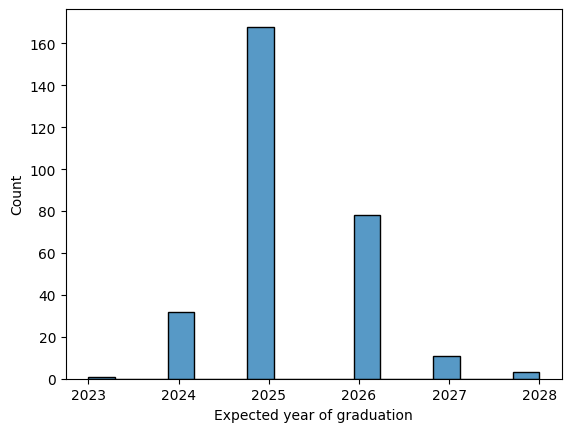

In [1446]:
filt = df['Expected year of graduation']!=-1
sb.histplot(df[filt]['Expected year of graduation'])
plt.show()

### IEEE members per committee

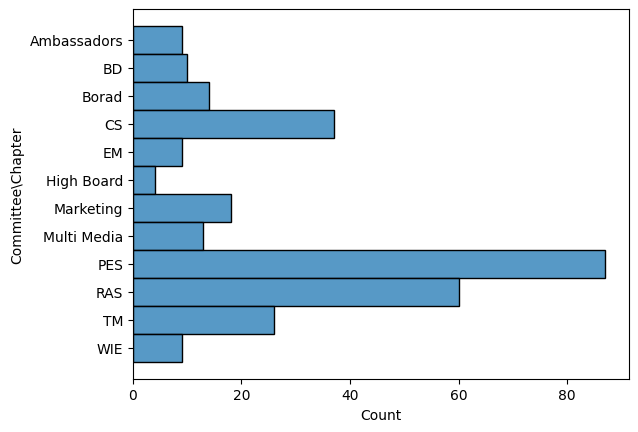

In [1447]:
sb.histplot(y = df['Committee\\Chapter'])
plt.show()

## Members per birth year

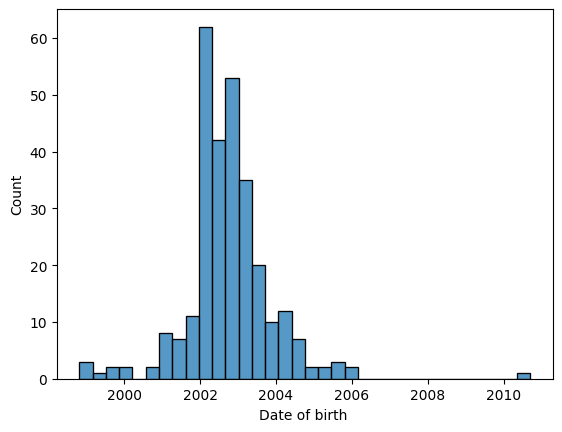

In [1448]:
sb.histplot(x = df['Date of birth '])
plt.show()

## Members per grade

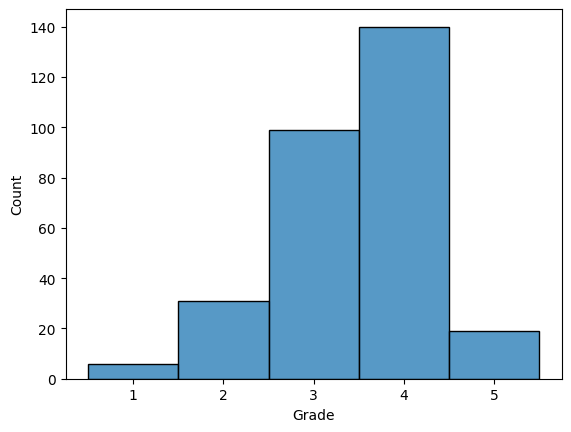

In [1450]:
sb.histplot(df['Grade'],bins = 5,discrete=True)
plt.show()

In [1465]:
## Member per city

<Axes: xlabel='Count', ylabel='City'>

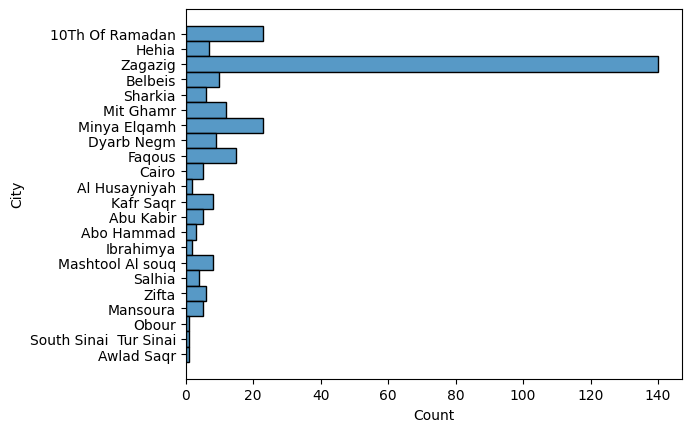

In [1467]:
sb.histplot(y = df['City'])

## IEEE members per faculty

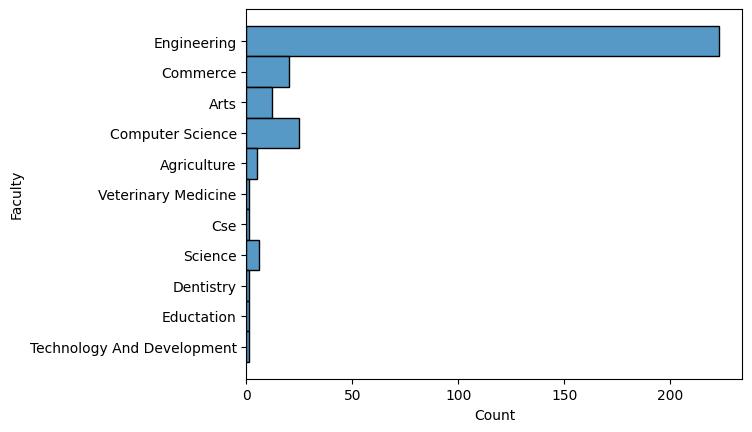

In [1451]:
sb.histplot(y  = df['Faculty'])
plt.show()

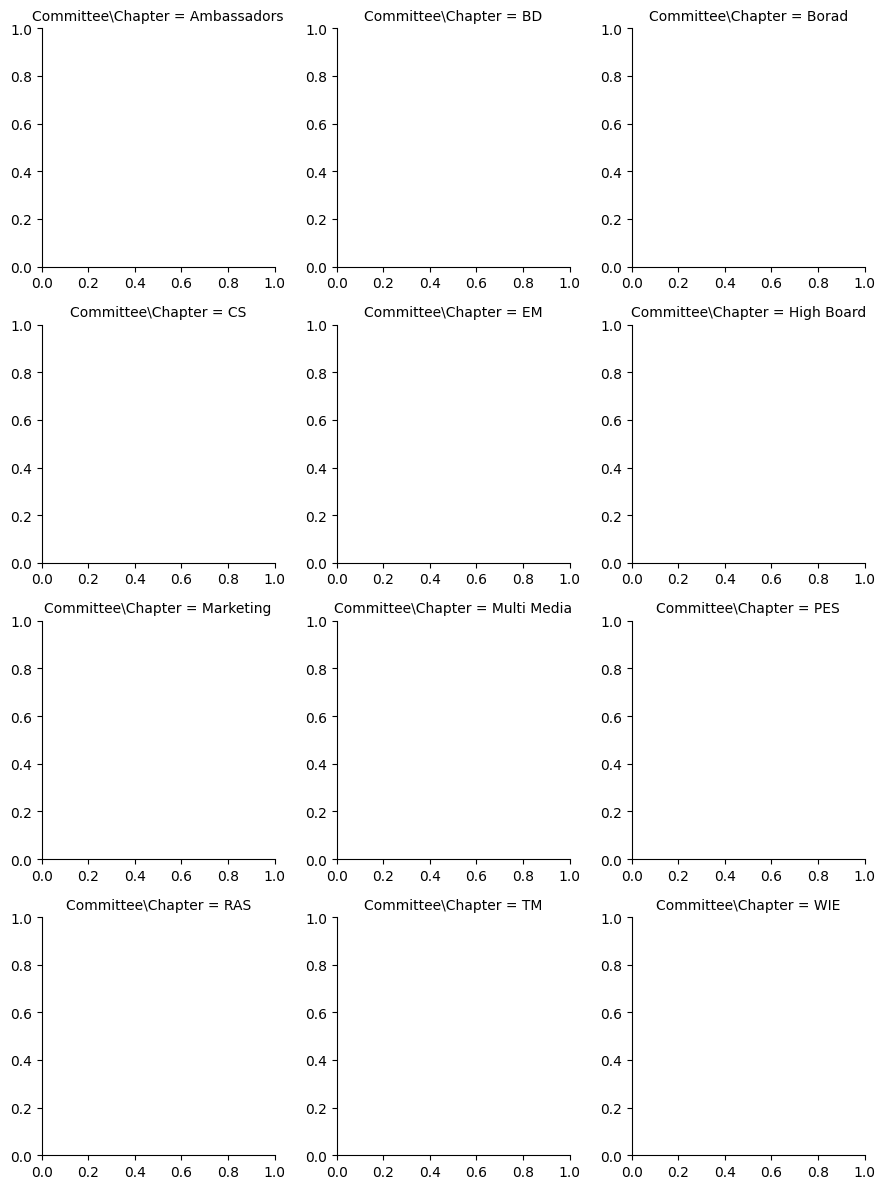

In [1462]:
g = sb.FacetGrid(data = df,col = "Committee\\Chapter",col_wrap= 3,sharey = False,sharex= False)

In [1463]:
    g.map_dataframe(sb.histplot,y = "Faculty",discrete = True)
g.tight_layout()
g.savefig("Faculty per Committee")